In [30]:
#import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#displaying first 5 entries for original data
df=pd.read_csv('first inten project.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


<strong><h1>1.Data preprocessing

<strong><h3>1.1Checking for null values and columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

<strong><h3>1.2Changing data types for columns in need and filling and missing values if any

In [4]:
# Desired data types
desired_dtypes = {'type of meal': 'category'
                  , 'room type': 'category'
                  , 'market segment type': 'category'
                  , 'P-C':'float64','P-not-C':'float64'
                  ,'booking status':'category','Booking_ID':'string'}


In [5]:

# Identify mismatched types
mismatched_cols = df.dtypes[df.dtypes != desired_dtypes].index.tolist()

# Convert only mismatched columns
if mismatched_cols:
  df = df.astype(desired_dtypes)
  print(f"Converted data types for columns: {', '.join(mismatched_cols)}")

df['date of reservation']=pd.to_datetime(df['date of reservation'], errors='coerce')


Converted data types for columns: Booking_ID, number of adults, number of children, number of weekend nights, number of week nights, type of meal, car parking space, room type, lead time, market segment type, repeated, P-C, P-not-C, average price , special requests, date of reservation, booking status


In [6]:
"""s=df['date of reservation']
null_values = s[s.isnull()]
print(null_values)"""
#because of conversion of the data types the incorrect date value of 29-2-2018 interpreted as Nan so replace value is needed to resolve the issue
df['date of reservation']=df['date of reservation'].replace(np.NaN, pd.to_datetime('2018-02-28'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  string        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  category      
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  category      
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  category      
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  float64       
 12  P-not-C           

In [8]:
df = df.reset_index(drop=True)

<strong>Checking data types after performing the changes

In [9]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0.0,0.0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0.0,0.0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0.0,0.0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0.0,0.0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0.0,0.0,77.00,0,2018-04-11,Canceled


<strong><h1>2.Handling the outliers

<strong><h3>2.1Drawing box plot for numerical columns

In [10]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

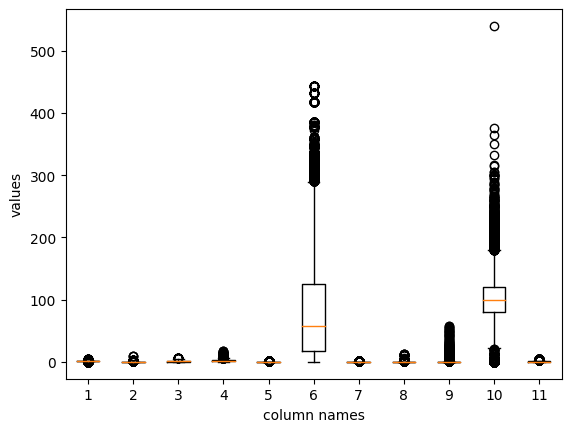

In [11]:
plt.boxplot(df_numeric)
plt.suptitle('')
plt.xlabel('column names')
plt.ylabel('values')
plt.show()

In [12]:
#df_numeric = df.select_dtypes(include=['int64', 'float64'])

<h3><strong>2.2Removing outliers using Z-score 

In [13]:
df['z_score'] = np.abs(zscore(df['average price ']))
df = df[df['z_score'] <= 3.5]
df = df.drop(columns=['z_score'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36119 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36119 non-null  string        
 1   number of adults          36119 non-null  int64         
 2   number of children        36119 non-null  int64         
 3   number of weekend nights  36119 non-null  int64         
 4   number of week nights     36119 non-null  int64         
 5   type of meal              36119 non-null  category      
 6   car parking space         36119 non-null  int64         
 7   room type                 36119 non-null  category      
 8   lead time                 36119 non-null  int64         
 9   market segment type       36119 non-null  category      
 10  repeated                  36119 non-null  int64         
 11  P-C                       36119 non-null  float64       
 12  P-not-C                

In [15]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27723
Not Selected     5132
Meal Plan 2      3259
Meal Plan 3         5
Name: count, dtype: int64

In [16]:
df['room type'].value_counts()

room type
Room_Type 1    28129
Room_Type 4     6048
Room_Type 6      864
Room_Type 2      687
Room_Type 5      260
Room_Type 7      124
Room_Type 3        7
Name: count, dtype: int64

In [17]:
df['market segment type'].value_counts()

market segment type
Online           23066
Offline          10520
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

<strong><h1>3.Transformation for categorical data

In [18]:
#making copy of the original data frame
df_copy=df.copy()

In [19]:
X=df_copy.drop(['booking status','Booking_ID'],axis=1)
y=df_copy['booking status']

In [20]:
# Create a label encoder
categorical_columns=df_copy[['type of meal','room type','market segment type']]
encoder = LabelEncoder()

# Encode the colors
df_copy['type of meal'] = encoder.fit_transform(df_copy['type of meal'])
df_copy['room type'] = encoder.fit_transform(df_copy['room type'])
df_copy['market segment type'] = encoder.fit_transform(df_copy['market segment type'])

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36119 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36119 non-null  string        
 1   number of adults          36119 non-null  int64         
 2   number of children        36119 non-null  int64         
 3   number of weekend nights  36119 non-null  int64         
 4   number of week nights     36119 non-null  int64         
 5   type of meal              36119 non-null  int32         
 6   car parking space         36119 non-null  int64         
 7   room type                 36119 non-null  int32         
 8   lead time                 36119 non-null  int64         
 9   market segment type       36119 non-null  int32         
 10  repeated                  36119 non-null  int64         
 11  P-C                       36119 non-null  float64       
 12  P-not-C                

<strong><h1>4.Feature engineering using PCA

In [25]:
X_edited=df_copy.drop(['type of meal','room type','market segment type','booking status','Booking_ID','date of reservation'],axis=1)

In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_edited)

# Perform PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [28]:
print(pca.explained_variance_ratio_)

[0.19461655 0.13882966 0.11611357 0.09209747 0.0886283  0.08490033
 0.07370416 0.06953895]


<strong><h1>5.Train test split the data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0)

<strong><h1>6.Choosing the model

In [33]:
#since we dealing with binary target variable logistic regression model will be best for this case
logit=LogisticRegression(random_state=0).fit(X_train,y_train)

In [34]:
#getting score
logit.score(X_test,y_test)

0.7751937984496124